In [101]:
# problem 1

from sklearn.datasets import load_iris
import pandas as pd
data = load_iris()

x = pd.DataFrame(data.data,columns=["sepal_length","sepal_width","petal_length","petal_width"])
y = pd.DataFrame(data.target,columns=["variety"])

# get only 2 columns from x,y
new_x = x[["sepal_length","petal_length"]]
df = pd.concat([new_x, y], axis=1)
subset = df.loc[(df['variety'] == 1)|(df['variety'] == 2)].reset_index(drop=True)
subset.head()

,sepal_length,petal_length,variety
0,7.0,4.7,1
1,6.4,4.5,1
2,6.9,4.9,1
3,5.5,4.0,1
4,6.5,4.6,1


C:\Users\diveintocode\anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


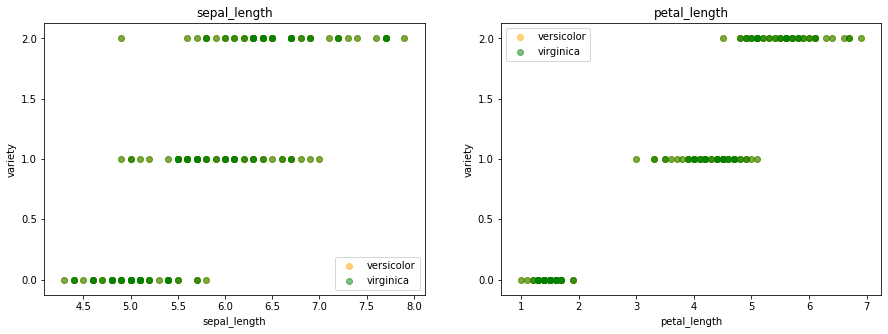

In [11]:
# problem 2

import numpy as np
import matplotlib.pyplot as plt

# scatter plot
figure = plt.figure(figsize=(15, 5))
variety_names = ['versicolor', 'virginica']
x_features = ['sepal_length', 'petal_length']
colors = ['orange','green']

for x_feature in range(len(x_features)):
    for a in range(len(variety_names)):
        ax1 = figure.add_subplot(1,2,x_feature+1)
        ax1.scatter(df[x_features[x_feature]],df['variety'],color=colors[a], label=variety_names[a], alpha=0.5)  
    ax1.legend()
    ax1.set_title(x_features[x_feature])
    ax1.set_xlabel(x_features[x_feature])
    ax1.set_ylabel('variety')

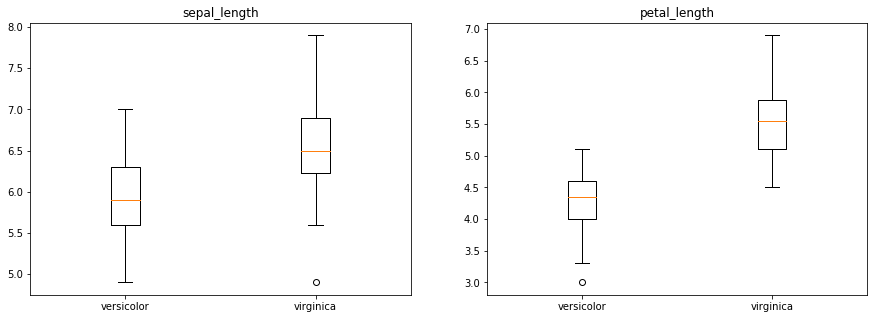

In [3]:
# boxplot

fig = plt.figure(figsize=(15,5))

import seaborn as sns

for feature in range(len(x_features)):
    x = []
    for i in range(len(variety_names)):
        target_variety = df.loc[df['variety']==i+1]
        x.append(list(target_variety[x_features[feature]]))
    ax2 = fig.add_subplot(1, 2, feature+1)
    ax2.boxplot(x)
    ax2.set_xticks([1, 2])
    ax2.set_xticklabels(variety_names)
    ax2.set_title(x_features[feature])

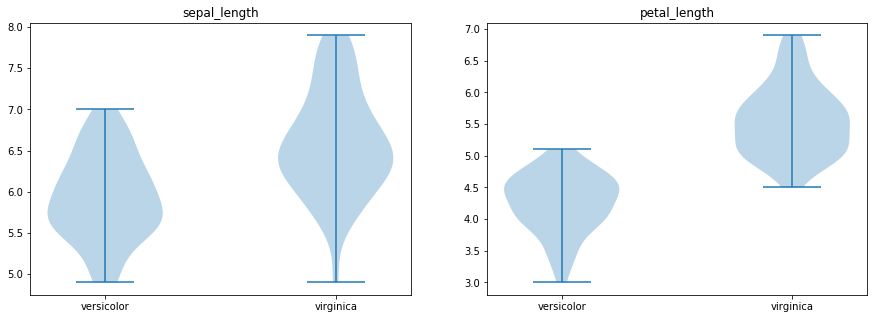

In [17]:
# violinplot 

fig = plt.figure(figsize=(15,5))

import seaborn as sns

for feature in range(len(x_features)):
    x = []
    for i in range(len(variety_names)):
        target_variety = df.loc[df['variety']==i+1]
        x.append(list(target_variety[x_features[feature]]))
    ax2 = fig.add_subplot(1, 2, feature+1)
    ax2.violinplot(x)
    ax2.set_xticks([1, 2])
    ax2.set_xticklabels(variety_names)
    ax2.set_title(x_features[feature])

In [14]:
# problem 3
import numpy as np
from sklearn.model_selection import train_test_split

X = np.array(subset.loc[:,["sepal_length","petal_length"]])
y = np.array(subset["variety"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [16]:
# problem 4
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_trans = scaler.transform(X_train)
X_test_trans = scaler.transform(X_test)

In [48]:
# problem 5
from sklearn.neighbors import KNeighborsClassifier

k_neigh_3 = KNeighborsClassifier(n_neighbors=3)
k_neigh_3.fit(X_train_trans, y_train.ravel())
pred_3 = k_neigh_3.predict(X_test_trans)
print("pred3 = ", pred_3)

k_neigh_5 = KNeighborsClassifier(n_neighbors=5)
k_neigh_5.fit(X_train_trans, y_train.ravel())
pred_5 = k_neigh_5.predict(X_test_trans)
print("pred5 = ", pred_5)

k_neigh_1 = KNeighborsClassifier(n_neighbors=1)
k_neigh_1.fit(X_train_trans, y_train.ravel())
pred_1 = k_neigh_1.predict(X_test_trans)
print("pred1 = ", pred_5)

pred3 =  [2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 1 1 1 2 1 1 1 2]
pred5 =  [2 2 2 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 2 1 1 1 2]
pred1 =  [2 2 2 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 2 1 1 1 2]


In [49]:
# problem 6

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

predictions = [pred_3, pred_5, pred_1]
keys = ["knn3","knn5","knn1"]

for a,prediction in enumerate(predictions,0):
    print("predictions of ", keys[a])
    print("accuracy =", accuracy_score(y_true=y_test, y_pred=prediction))
    print("precision =", precision_score(y_true=y_test, y_pred=prediction,average=None))    
    print("recall =", recall_score(y_true=y_test, y_pred=prediction,average=None))  
    print("f1 score =", f1_score(y_true=y_test, y_pred=prediction,average=None)) 
    print("confusion matrix =", confusion_matrix(y_true=y_test, y_pred=prediction)) 
    print("--------------------------------------------------------")

predictions of  knn3
accuracy = 0.8
precision = [0.8 0.8]
recall = [0.85714286 0.72727273]
f1 score = [0.82758621 0.76190476]
confusion matrix = [[12  2]
 [ 3  8]]
--------------------------------------------------------
predictions of  knn5
accuracy = 0.8
precision = [0.76470588 0.875     ]
recall = [0.92857143 0.63636364]
f1 score = [0.83870968 0.73684211]
confusion matrix = [[13  1]
 [ 4  7]]
--------------------------------------------------------
predictions of  knn1
accuracy = 0.8
precision = [0.8 0.8]
recall = [0.85714286 0.72727273]
f1 score = [0.82758621 0.76190476]
confusion matrix = [[12  2]
 [ 3  8]]
--------------------------------------------------------


### explanations

**Accuracy:** Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations

**Precision:** Precision is the ratio of correctly predicted positive observations to the total predicted positive observations

**Recall:** Recall is the ratio of correctly predicted positive observations to the all observations in actual class

**F1 score:** F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account

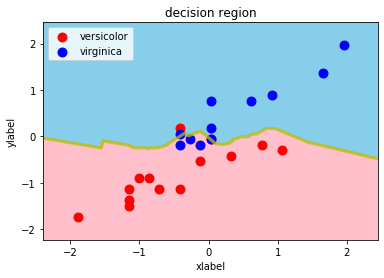

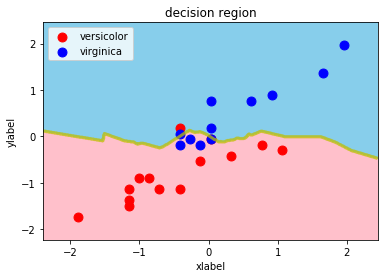

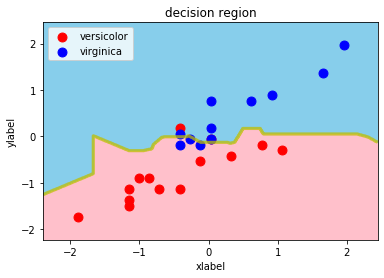

In [58]:
# problem 7

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

models = [k_neigh_3, k_neigh_5, k_neigh_1]
for a,model in enumerate(models, 1):
    decision_region(X_test_trans, y_test, model)

In [66]:
def display_outputs(title,pred,model,std):
    print(title)
    print("pred = ", pred)
    print("accuracy =", accuracy_score(y_true=y_test, y_pred=pred))
    print("precision =", precision_score(y_true=y_test, y_pred=pred,average=None))    
    print("recall =", recall_score(y_true=y_test, y_pred=pred,average=None))  
    print("f1 score =", f1_score(y_true=y_test, y_pred=pred,average=None)) 
    print("confusion matrix =", confusion_matrix(y_true=y_test, y_pred=pred)) 
    if (std == True):
        decision_region(X_test_trans, y_test, model)
    else:
        decision_region(X_test, y_test, model)
    print("--------------------------------------------------------")

Logical Regression
pred =  [2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 2 1 1 2 1 1 1 2]
accuracy = 0.84
precision = [0.85714286 0.81818182]
recall = [0.85714286 0.81818182]
f1 score = [0.85714286 0.81818182]
confusion matrix = [[12  2]
 [ 2  9]]


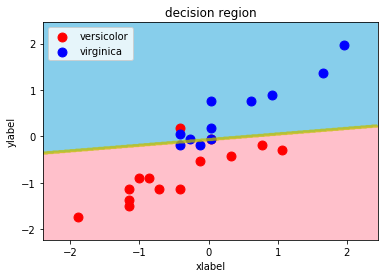

--------------------------------------------------------
SVM
pred =  [2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 2 1 1 2 1 1 1 2]
accuracy = 0.84
precision = [0.85714286 0.81818182]
recall = [0.85714286 0.81818182]
f1 score = [0.85714286 0.81818182]
confusion matrix = [[12  2]
 [ 2  9]]


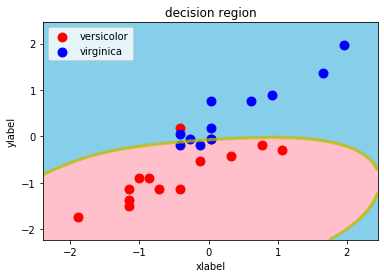

--------------------------------------------------------
Decision tree
pred =  [2 2 2 1 1 1 1 2 1 1 1 1 1 2 2 1 1 2 1 1 2 1 1 1 2]
accuracy = 0.84
precision = [0.8125     0.88888889]
recall = [0.92857143 0.72727273]
f1 score = [0.86666667 0.8       ]
confusion matrix = [[13  1]
 [ 3  8]]


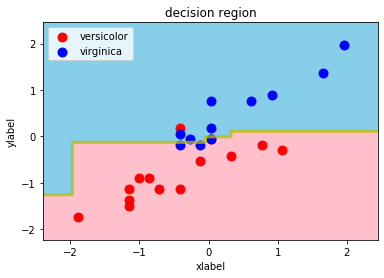

--------------------------------------------------------
Random Forest
pred =  [2 2 2 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 2 1 1 1 2]
accuracy = 0.8
precision = [0.76470588 0.875     ]
recall = [0.92857143 0.63636364]
f1 score = [0.83870968 0.73684211]
confusion matrix = [[13  1]
 [ 4  7]]


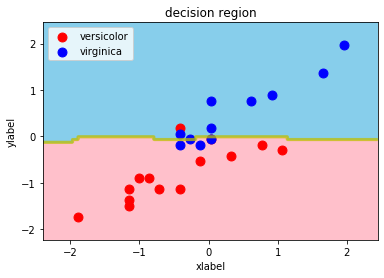

--------------------------------------------------------


In [67]:
# problem 8

# LogisticRegression
from sklearn.linear_model import LogisticRegression
lR_fit = LogisticRegression(random_state=0).fit(X_train_trans, y_train)
lR_predict = lR_fit.predict(X_test_trans)
display_outputs('Logical Regression',lR_predict,lR_fit,std=True)

# SVM
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train_trans, y_train)
clf_pred = clf.predict(X_test_trans)
display_outputs('SVM',clf_pred,clf,std=True)

# Decision tree
from sklearn.tree import DecisionTreeClassifier
dTC = DecisionTreeClassifier(random_state=0)
dTC.fit(X_train_trans, y_train)
dTC_pred = dTC.predict(X_test_trans)
display_outputs('Decision tree',dTC_pred,dTC,std=True)

# Random forest
from sklearn.ensemble import RandomForestClassifier
rFC = RandomForestClassifier(max_depth=2, random_state=0)
rFC.fit(X_train_trans, y_train)
rFC_pred = rFC.predict(X_test_trans)
display_outputs('Random Forest',rFC_pred,rFC,std=True)

**comparison**
All method have almost identical prediction results, but SVM and logical regression has the highest precision results which to me makes their results more precise

Knn
pred =  [2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 1 1 1 2 1 1 1 2]
accuracy = 0.8
precision = [0.8 0.8]
recall = [0.85714286 0.72727273]
f1 score = [0.82758621 0.76190476]
confusion matrix = [[12  2]
 [ 3  8]]


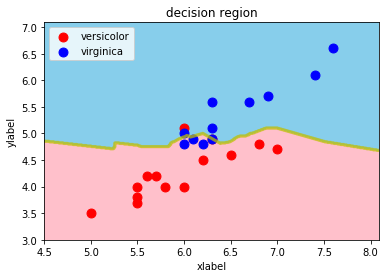

--------------------------------------------------------
Knn
pred =  [2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 2 1 1 2 1 1 1 2]
accuracy = 0.84
precision = [0.85714286 0.81818182]
recall = [0.85714286 0.81818182]
f1 score = [0.85714286 0.81818182]
confusion matrix = [[12  2]
 [ 2  9]]


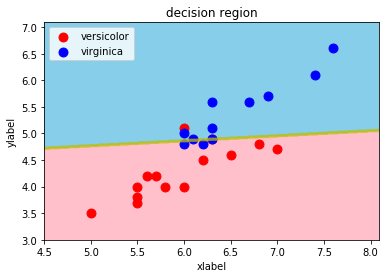

--------------------------------------------------------
Knn
pred =  [2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 2 1 1 2 1 1 1 2]
accuracy = 0.84
precision = [0.85714286 0.81818182]
recall = [0.85714286 0.81818182]
f1 score = [0.85714286 0.81818182]
confusion matrix = [[12  2]
 [ 2  9]]


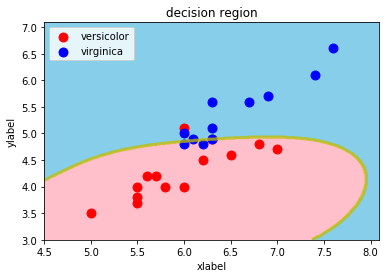

--------------------------------------------------------
Knn
pred =  [2 2 2 1 1 1 1 2 1 1 1 1 1 2 2 1 1 2 1 1 2 1 1 1 2]
accuracy = 0.84
precision = [0.8125     0.88888889]
recall = [0.92857143 0.72727273]
f1 score = [0.86666667 0.8       ]
confusion matrix = [[13  1]
 [ 3  8]]


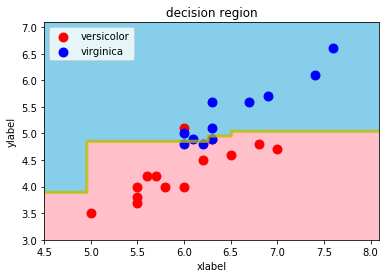

--------------------------------------------------------
Knn
pred =  [2 2 2 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 2 1 1 1 2]
accuracy = 0.8
precision = [0.76470588 0.875     ]
recall = [0.92857143 0.63636364]
f1 score = [0.83870968 0.73684211]
confusion matrix = [[13  1]
 [ 4  7]]


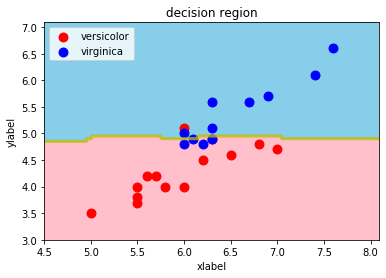

--------------------------------------------------------


In [69]:
# problem 9

# knn
k_neigh_3_2 = KNeighborsClassifier(n_neighbors=3)
k_neigh_3_2.fit(X_train, y_train.ravel())
pred_3_2 = k_neigh_3_2.predict(X_test)
display_outputs('Knn',pred_3_2,k_neigh_3_2,std=False)

# LogisticRegression
from sklearn.linear_model import LogisticRegression
lR_fit = LogisticRegression(random_state=0).fit(X_train, y_train)
lR_predict = lR_fit.predict(X_test)
display_outputs('Knn',lR_predict,lR_fit,std=False)

# SVM
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)
display_outputs('Knn',clf_pred,clf,std=False)

# Decision tree
from sklearn.tree import DecisionTreeClassifier
dTC = DecisionTreeClassifier(random_state=0)
dTC.fit(X_train, y_train)
dTC_pred = dTC.predict(X_test)
display_outputs('Knn',dTC_pred,dTC,std=False)

# Random forest
from sklearn.ensemble import RandomForestClassifier
rFC = RandomForestClassifier(max_depth=2, random_state=0)
rFC.fit(X_train, y_train)
rFC_pred = rFC.predict(X_test)
display_outputs('Knn',rFC_pred,rFC,std=False)

**Standardization**: is a scaling technique where the values are centered around the mean with a unit standard deviation

Knn
pred =  [1 0 2 1 1 0 1 1 1 1 2 0 0 0 0 2 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
accuracy = 0.9473684210526315
precision = [1.         0.90909091 0.91666667]
recall = [1.         0.90909091 0.91666667]
f1 score = [1.         0.90909091 0.91666667]
confusion matrix = [[15  0  0]
 [ 0 10  1]
 [ 0  1 11]]


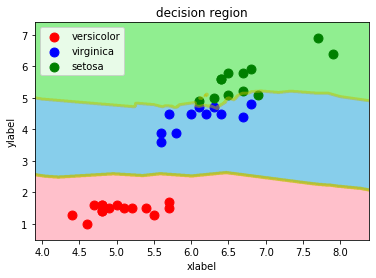

--------------------------------------------------------
Knn
pred =  [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
accuracy = 1.0
precision = [1. 1. 1.]
recall = [1. 1. 1.]
f1 score = [1. 1. 1.]
confusion matrix = [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


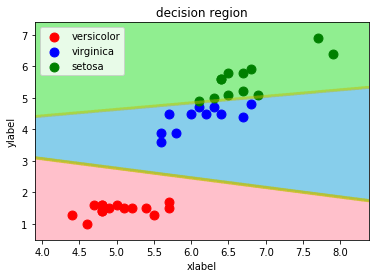

--------------------------------------------------------
Knn
pred =  [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
accuracy = 1.0
precision = [1. 1. 1.]
recall = [1. 1. 1.]
f1 score = [1. 1. 1.]
confusion matrix = [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


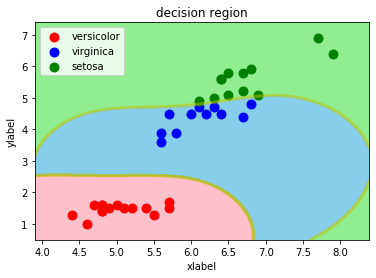

--------------------------------------------------------
Knn
pred =  [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
accuracy = 1.0
precision = [1. 1. 1.]
recall = [1. 1. 1.]
f1 score = [1. 1. 1.]
confusion matrix = [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


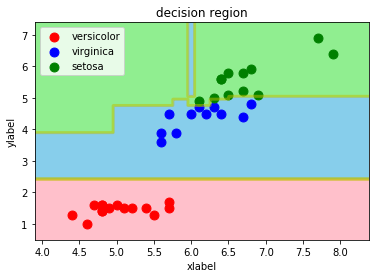

--------------------------------------------------------
Knn
pred =  [1 0 2 1 2 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
accuracy = 0.9736842105263158
precision = [1.         1.         0.92307692]
recall = [1.         0.90909091 1.        ]
f1 score = [1.         0.95238095 0.96      ]
confusion matrix = [[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]


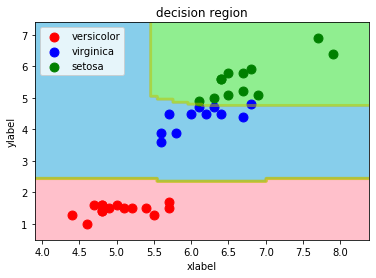

--------------------------------------------------------


In [103]:
# problem 10

def decision_region_2(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica','setosa']):
    # setting
    scatter_color = ['red', 'blue', 'green']
    contourf_color = ['pink', 'skyblue', 'lightgreen']
    n_class = 3
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

def display_outputs_2(title,pred,model,std):
    print(title)
    print("pred = ", pred)
    print("accuracy =", accuracy_score(y_true=y_test, y_pred=pred))
    print("precision =", precision_score(y_true=y_test, y_pred=pred,average=None))    
    print("recall =", recall_score(y_true=y_test, y_pred=pred,average=None))  
    print("f1 score =", f1_score(y_true=y_test, y_pred=pred,average=None)) 
    print("confusion matrix =", confusion_matrix(y_true=y_test, y_pred=pred)) 
    if (std == True):
        decision_region_2(X_test_trans, y_test, model)
    else:
        decision_region_2(X_test, y_test, model)
    print("--------------------------------------------------------")
    
# new variables with all targets
X2 = df.iloc[:, :-1].values
y2 = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.25, random_state=42)

# knn
k_neigh_3_2 = KNeighborsClassifier(n_neighbors=3)
k_neigh_3_2.fit(X_train, y_train.ravel())
pred_3_2 = k_neigh_3_2.predict(X_test)
display_outputs_2('Knn',pred_3_2,k_neigh_3_2,std=False)

# LogisticRegression
from sklearn.linear_model import LogisticRegression
lR_fit = LogisticRegression(random_state=0).fit(X_train, y_train)
lR_predict = lR_fit.predict(X_test)
display_outputs_2('Knn',lR_predict,lR_fit,std=False)

# SVM
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)
display_outputs_2('Knn',clf_pred,clf,std=False)

# Decision tree
from sklearn.tree import DecisionTreeClassifier
dTC = DecisionTreeClassifier(random_state=0)
dTC.fit(X_train, y_train)
dTC_pred = dTC.predict(X_test)
display_outputs_2('Knn',dTC_pred,dTC,std=False)

# Random forest
from sklearn.ensemble import RandomForestClassifier
rFC = RandomForestClassifier(max_depth=2, random_state=0)
rFC.fit(X_train, y_train)
rFC_pred = rFC.predict(X_test)
display_outputs_2('Knn',rFC_pred,rFC,std=False)